# **Sales Prediction**
---



**Sales prediction using Big-Mart sales data**




### **Import the required modules**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from collections import Counter
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline
warnings.filterwarnings('ignore')

### **Loading the data and stastical analysis**

In [ ]:
df = pd.read_csv('SampleSuperstore.csv')
df.head(20)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [ ]:
#Statistical info
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
#Datatype attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
#Unique values
df.apply(lambda x: len(x.unique()))

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

###**Adjusting the Data-Frame**

Removing unwanted attributes such as Postal code , country as it serves no purpose for our sales prediction.

In [ ]:
df = df.drop(['Postal Code','Country'],axis=1)

In [ ]:
df = df.rename(columns = {'Ship Mode':'Ship_Mode'})
df = df.rename(columns = {'Sub-Category':'Sub_Category'})


In [ ]:
#Categorical attributes
cat_col = []
for x in df.dtypes.index:
  if df.dtypes[x] == 'object':
    cat_col.append(x)
cat_col

['Ship_Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub_Category']

In [ ]:
#printing the columns data:
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Ship_Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship_Mode, dtype: int64

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Ken

In [ ]:
df.head()

,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


We will be working with the above table for Data Visualization and Explanatory Data Analysis

### **Data Visualization**

**Correlation between data**

In [ ]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


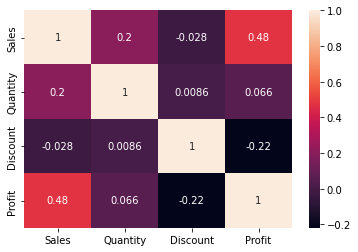

In [ ]:
sns.heatmap(df.corr(), annot=True)

**Explanatory Data Analysis**

In [ ]:
df["Ship_Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship_Mode, dtype: int64

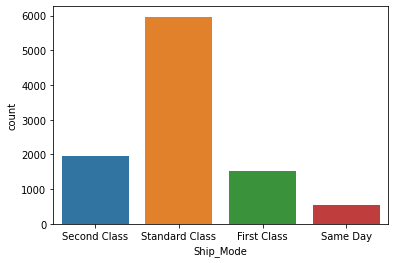

In [ ]:
sns.countplot(x= df['Ship_Mode'])

In [ ]:
df["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

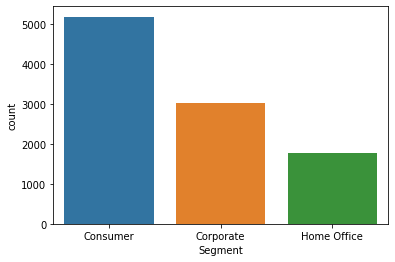

In [ ]:
sns.countplot(x= df['Segment'])

In [ ]:
df["Category"].value_counts()


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

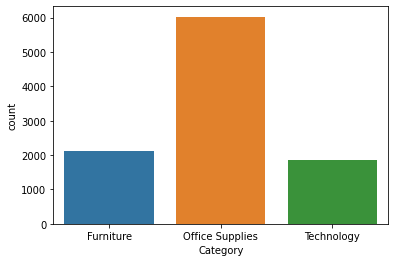

In [ ]:
sns.countplot(x= df['Category'])

[Text(0, 0, 'Bookcases'),
 Text(0, 0, 'Chairs'),
 Text(0, 0, 'Labels'),
 Text(0, 0, 'Tables'),
 Text(0, 0, 'Storage'),
 Text(0, 0, 'Furnishings'),
 Text(0, 0, 'Art'),
 Text(0, 0, 'Phones'),
 Text(0, 0, 'Binders'),
 Text(0, 0, 'Appliances'),
 Text(0, 0, 'Paper'),
 Text(0, 0, 'Accessories'),
 Text(0, 0, 'Envelopes'),
 Text(0, 0, 'Fasteners'),
 Text(0, 0, 'Supplies'),
 Text(0, 0, 'Machines'),
 Text(0, 0, 'Copiers')]

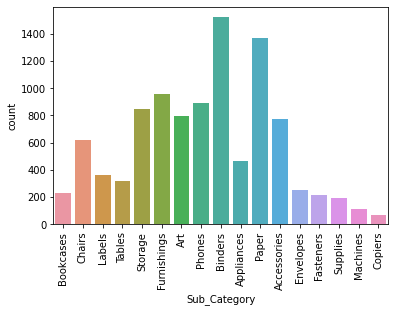

In [ ]:
l = list(df['Sub_Category'].unique())
chart = sns.countplot(df["Sub_Category"])
chart.set_xticklabels(labels=l, rotation=90)

In [ ]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

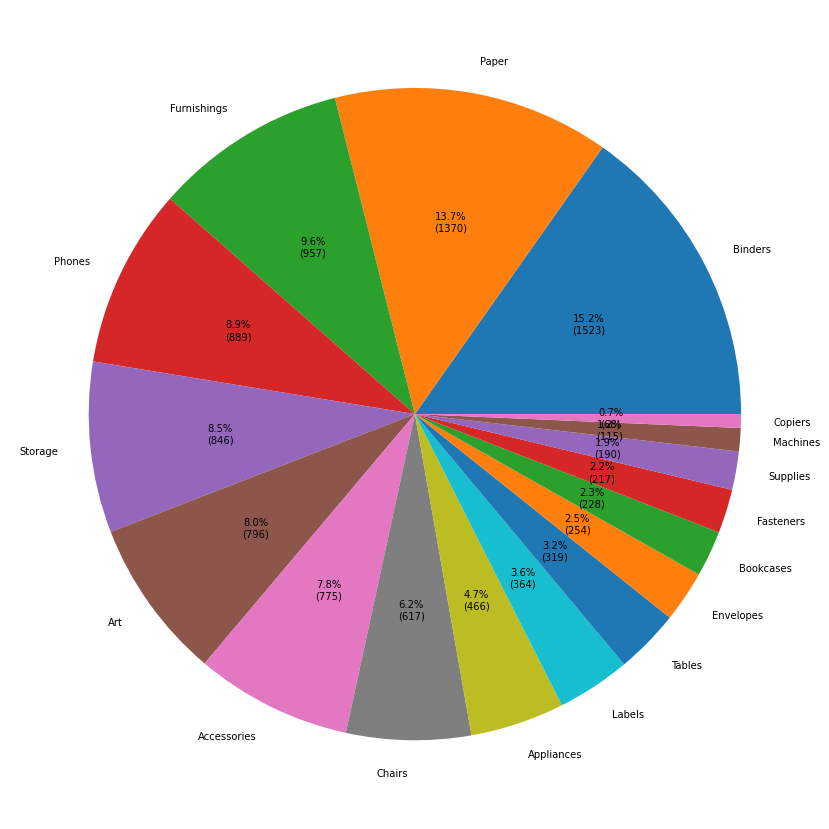

In [ ]:
plt.figure(figsize=(15,15))
plt.pie(df["Sub_Category"].value_counts(), labels= df["Sub_Category"].value_counts().index, autopct =autopct_format(df["Sub_Category"].value_counts()))
plt.show()

In [ ]:
st_profit=df.groupby(["State"])["Profit"].sum().nlargest(20)

In [ ]:
st_profit

State
California       76381.3871
New York         74038.5486
Washington       33402.6517
Michigan         24463.1876
Virginia         18597.9504
Indiana          18382.9363
Georgia          16250.0433
Kentucky         11199.6966
Minnesota        10823.1874
Delaware          9977.3748
New Jersey        9772.9138
Wisconsin         8401.8004
Rhode Island      7285.6293
Maryland          7031.1788
Massachusetts     6785.5016
Missouri          6436.2105
Alabama           5786.8253
Oklahoma          4853.9560
Arkansas          4008.6871
Connecticut       3511.4918
Name: Profit, dtype: float64

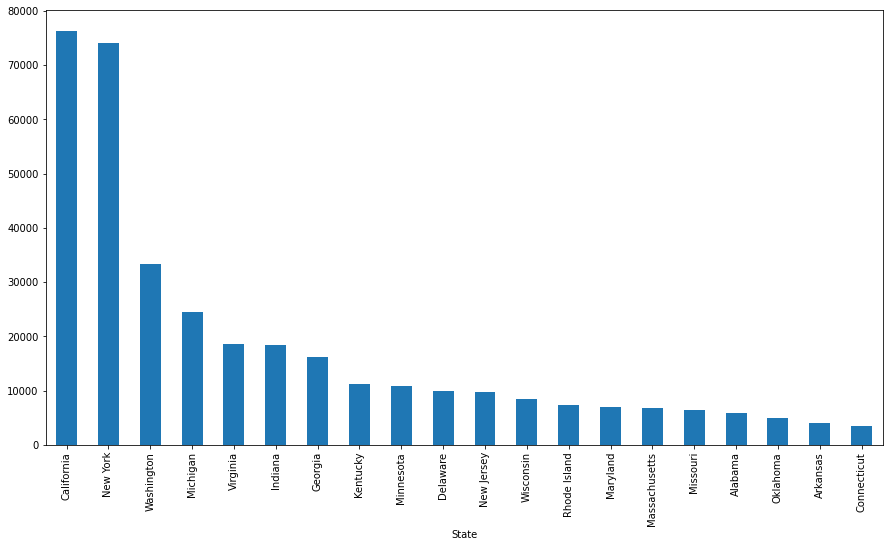

In [ ]:
plt.figure(figsize=(15,8))
st_profit.plot.bar()

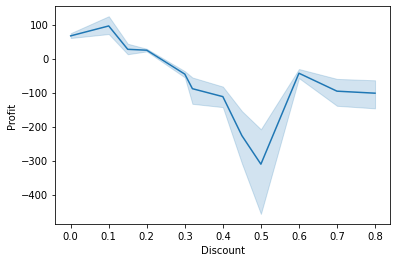

In [ ]:
sns.lineplot(data=df, x="Discount", y= "Profit")

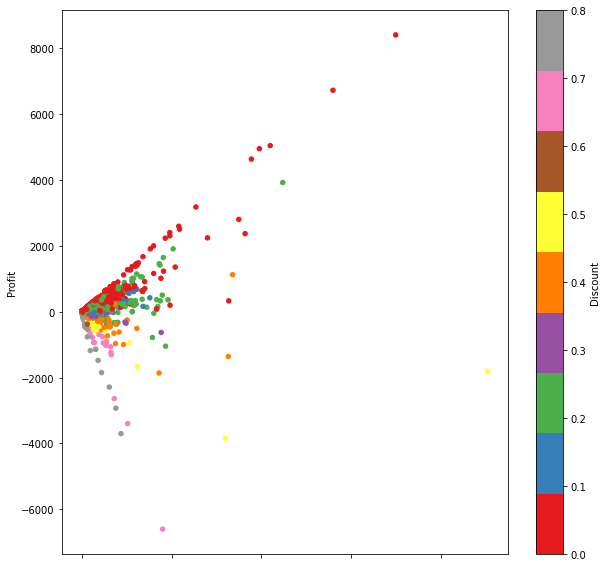

In [ ]:
df.plot(kind="scatter",x="Sales",y="Profit", c="Discount", colormap="Set1",figsize=(10,10))

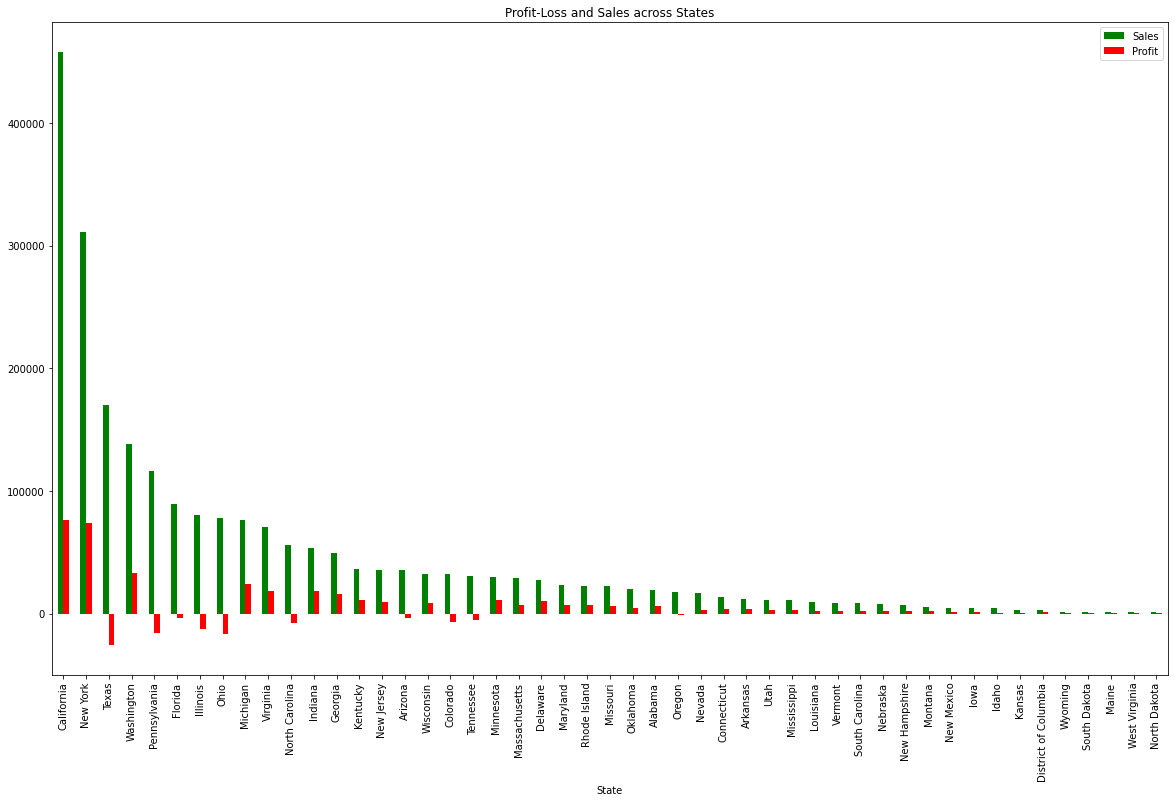

In [ ]:
data1= df.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)
data1[:].plot.bar(color = ["Green","Red"], figsize=(20,12))
plt.title("Profit-Loss and Sales across States")
plt.show()

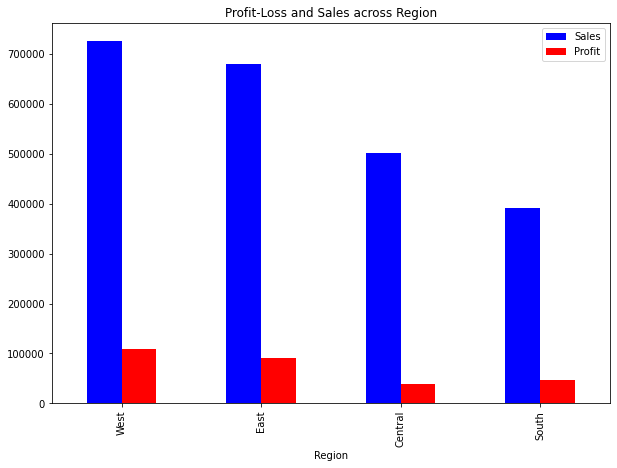

In [ ]:
data1= df.groupby("Region")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False)
data1[:].plot.bar(color = ["Blue","Red"], figsize=(10,7))
plt.title("Profit-Loss and Sales across Region")
plt.show()

**Conclusion on the EDA:**



1. The western region generates highest profit.
2. California, NewYork and Washington generates the most sales compared to the other places.
3. The central region generates lowest profit.
4. Texas, Pennsylvenia, Florida, Illinois, Ohio and some other states are generating loss with high sale. So we need to give some attention towards them.

If we were to give suggestions to the organization using the data analysis we did above the suggestions would be to focus sales more on California and New York, while decreasing the focus on states like Texas, Florida, Ohio etc, another sugggestion would be to decrease the discount rates as it reduces the profit we get by sales. Another important conclusion we drew from here is that the the more sales doesn't necessarily mean that we get high amount of profit. 

**Distribution of Sale**

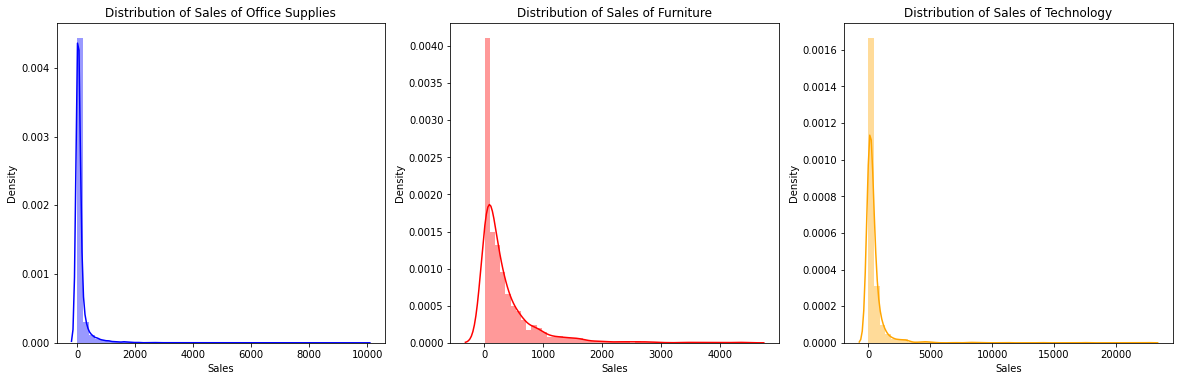

In [ ]:
f= plt.figure(figsize=(20,20))

ax=f.add_subplot(3,3,1)
sns.distplot(df[(df.Category== 'Office Supplies')]["Sales"],color='b',ax=ax)
ax.set_title('Distribution of Sales of Office Supplies');

ax=f.add_subplot(3,3,2)
sns.distplot(df[(df.Category == 'Furniture')]['Sales'],color='r',ax=ax)
ax.set_title('Distribution of Sales of Furniture');

ax=f.add_subplot(3,3,3)
sns.distplot(df[(df.Category== 'Technology')]["Sales"],color='orange',ax=ax)
ax.set_title('Distribution of Sales of Technology');

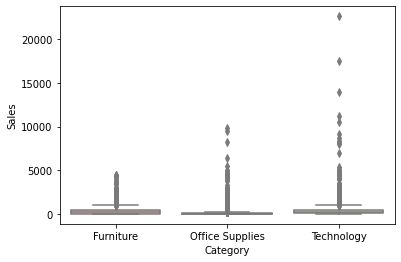

In [ ]:
sns.boxplot(x = 'Category', y = 'Sales', data = df, palette='Pastel1' );

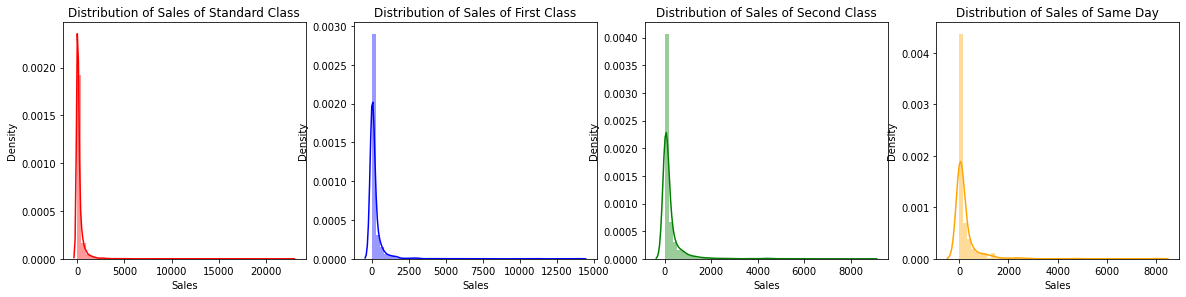

In [ ]:
df = df.rename(columns = {'Ship Mode':'Ship_Mode'})

f= plt.figure(figsize=(20,20))

ax=f.add_subplot(4,4,1)
sns.distplot(df[(df.Ship_Mode== 'Standard Class')]["Sales"],color='r',ax=ax)
ax.set_title('Distribution of Sales of Standard Class');

ax=f.add_subplot(4,4,2)
sns.distplot(df[(df.Ship_Mode== 'First Class')]["Sales"],color='b',ax=ax)
ax.set_title('Distribution of Sales of First Class');

ax=f.add_subplot(4,4,3)
sns.distplot(df[(df.Ship_Mode== 'Second Class')]["Sales"],color='green',ax=ax)
ax.set_title('Distribution of Sales of Second Class');

ax=f.add_subplot(4,4,4)
sns.distplot(df[(df.Ship_Mode== 'Same Day')]["Sales"],color='orange',ax=ax)
ax.set_title('Distribution of Sales of Same Day');

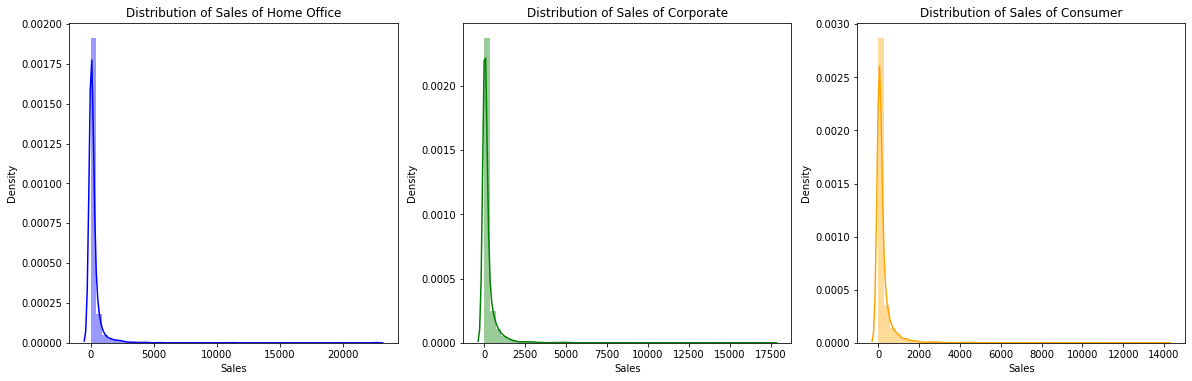

In [ ]:
f= plt.figure(figsize=(20,20))
ax=f.add_subplot(3,3,1)
sns.distplot(df[(df.Segment== 'Home Office')]["Sales"],color='b',ax=ax)
ax.set_title('Distribution of Sales of Home Office');

ax=f.add_subplot(3,3,2)
sns.distplot(df[(df.Segment== 'Corporate')]["Sales"],color='green',ax=ax)
ax.set_title('Distribution of Sales of Corporate');

ax=f.add_subplot(3,3,3)
sns.distplot(df[(df.Segment== 'Consumer')]["Sales"],color='orange',ax=ax)
ax.set_title('Distribution of Sales of Consumer');

**Profit Vs Sales**

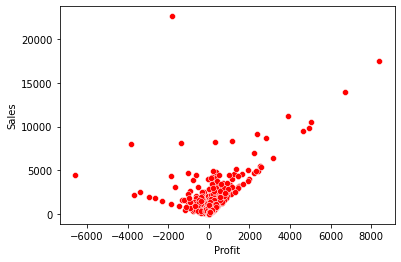

In [ ]:
sns.scatterplot(x="Profit", y="Sales", data=df,color='r');

Profit v Sales categorized by Category

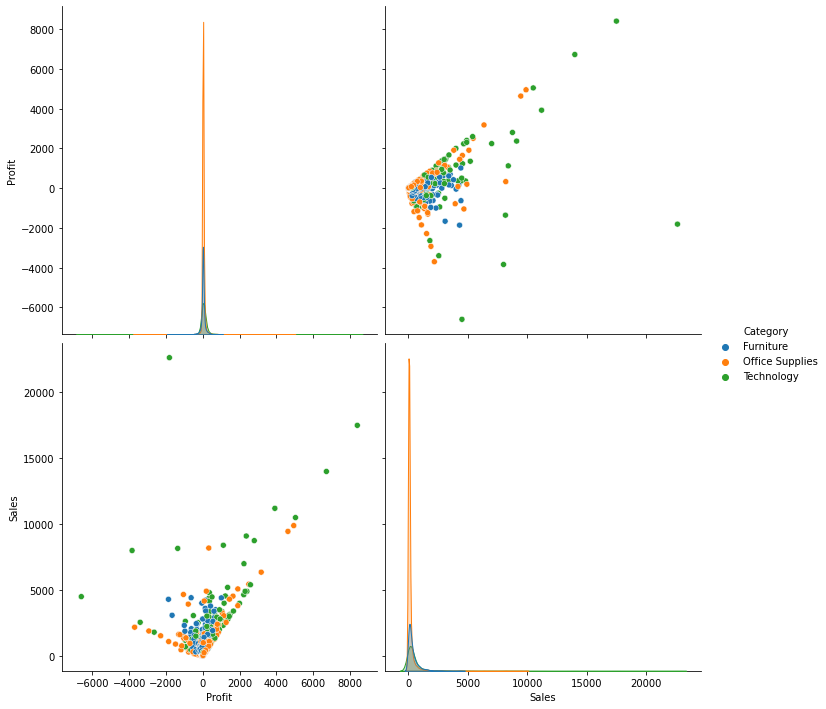

In [ ]:
sns.pairplot(df[['Profit','Sales','Category']], hue="Category",size=5);

### **Feature Engineering**

**Missing Values & Dataframe description**

In [ ]:
def check_df(dataframe, head=5):
    print("♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Shape ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥")
    print(dataframe.shape)

    print("♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Types ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥")
    print(dataframe.dtypes)

    print("♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ NA ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥")
    print(dataframe.isnull().sum())

    print("♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Quantiles ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
check_df(df)

♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Shape ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥
(9994, 11)
♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Types ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥
Ship_Mode        object
Segment          object
City             object
State            object
Region           object
Category         object
Sub_Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object
♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ NA ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥
Ship_Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64
♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Quantiles ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥
              0.00      0.05     0.50        0.95         0.99       1.00
Sales        0.444   4.98000  54.4900  956.984245  2481.694600  22638.480
Quantity     1.000   1.00000   3.0000    8.000000    11.000000     14.000
Discount     0.000   0.00000   0.2000    0.700000     0.800000      0.800
Profit   -6

There are no missing values in the above given data

**Cardinality Reduction**

In [ ]:
top_ten_cities=df["City"].value_counts().head(10).index
df["City"]=df["City"].apply(lambda c: c if c in top_ten_cities else "others")
top_ten_states=df["State"].value_counts().head(10).index
df["State"]=df["State"].apply(lambda c: c if c in top_ten_states else "others")

**Outliers**

In [ ]:
q1,q2 =df["Profit"].quantile([0.1,0.9])
df=df[df["Profit"].between(q1,q2)]

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['Ship_Mode'] = encoder.fit_transform(df['Ship_Mode'])

df['Segment'] = encoder.fit_transform(df['Segment'])

df['City'] = encoder.fit_transform(df['City'])

df['State'] = encoder.fit_transform(df['State'])

df['Region'] = encoder.fit_transform(df['Region'])

df['Category'] = encoder.fit_transform(df['Category'])

df['Sub_Category'] = encoder.fit_transform(df['Sub_Category'])

df['Sales'] = encoder.fit_transform(df['Sales'])

df['Quantity'] = encoder.fit_transform(df['Quantity'])

df['Discount'] = encoder.fit_transform(df['Discount'])

df['Profit'] = encoder.fit_transform(df['Profit'])

In [ ]:
df.head(20)

,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,2,0,10,10,2,0,4,3802,1,0,4840
2,2,1,3,0,3,1,10,942,1,0,2401
4,3,0,10,1,2,1,14,1317,1,3,1357
5,3,0,3,0,3,0,9,2151,6,0,3419
6,3,0,3,0,3,1,2,464,3,0,1203
8,3,0,3,0,3,1,3,1134,2,3,2168
9,3,0,3,0,3,1,1,3071,4,0,4617
10,3,0,3,0,3,0,16,4358,8,3,5514
11,3,0,3,0,3,2,13,4318,3,3,5306
12,3,0,10,5,2,1,12,995,2,3,2098


**One-Hot Encoding**

In [ ]:
dm = pd.get_dummies(df, columns=['Ship_Mode', 'Segment', 'Category'])
dm.head()

,City,State,Region,Sub_Category,Sales,Quantity,Discount,Profit,Ship_Mode_0,Ship_Mode_1,Ship_Mode_2,Ship_Mode_3,Segment_0,Segment_1,Segment_2,Category_0,Category_1,Category_2
0,10,10,2,4,3802,1,0,4840,0,0,1,0,1,0,0,1,0,0
2,3,0,3,10,942,1,0,2401,0,0,1,0,0,1,0,0,1,0
4,10,1,2,14,1317,1,3,1357,0,0,0,1,1,0,0,0,1,0
5,3,0,3,9,2151,6,0,3419,0,0,0,1,1,0,0,1,0,0
6,3,0,3,2,464,3,0,1203,0,0,0,1,1,0,0,0,1,0


One Hot Encoded Data-Frame isn't of any use for us hence we will be continuing with our original dataframe 'df'

**Feature Scaling**



```
#Done after splitting the values:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(X_train)


```



### **Splitting Values and Creating Model**

In [ ]:
target="Sales"
X=df.drop(['Sales'],axis=1)
y=df['Sales']
print(X.shape)
print(y.shape)

(7994, 10)
(7994,)


**Splitting the values**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.4, random_state=10)

**Scaling using Scikit Learn Standardization(part of feature engineering)**


In [ ]:
from sklearn.preprocessing import StandardScaler
#For X_train
scaler_train = StandardScaler().fit(X_train)
X_train_std = scaler_train.transform(X_train)
#For X_test
X_test_std = scaler_train.transform(X_test)

### **Linear Regression**

**Our Implementation**

In [ ]:
class LinearRegressionIn() :
      
    def __init__( self, learning_rate, iterations ) :
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit( self, X, Y ) :
        self.m, self.n = X.shape
        self.W = np.zeros( self.n )          
        self.b = 0
        self.X = X        
        self.Y = Y
                  
        for i in range( self.iterations ) :             
            self.update_weights()             
        return self

    def update_weights( self ) :             
        Y_pred = self.predict( self.X )         
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m   
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m      
        self.W = self.W - self.learning_rate * dW      
        self.b = self.b - self.learning_rate * db         
        return self

    def predict( self, X ) :      
        return X.dot( self.W ) + self.b
     

In [ ]:
model_lr = LinearRegressionIn(iterations = 2000, learning_rate = 0.01)
model_lr.fit(X_train_std,y_train)
pred_lr = model_lr.predict(X_test_std)

In [ ]:
Acc_lr = r2_score(y_test, pred_lr)
print("Accuracy:",round(Acc_lr,2))

Accuracy: 0.48


**Sci-Kit Learn Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
model_ilr = LinearRegression()
model_ilr.fit(X_train_std,y_train)
pred_ilr = model_ilr.predict(X_test_std)

In [ ]:
Acc_ilr = r2_score(y_test, pred_ilr)
print("Accuracy:",round(Acc_ilr,2))

Accuracy: 0.48


Comparing the values of inbuilt and our implementation

In [ ]:
finalData_lr = pd.DataFrame({'Actual': y_test, 'Predicted_Inbuilt': pred_ilr,'Our_Implementation': pred_lr})
finalData_lr.head()

,Actual,Predicted_Inbuilt,Our_Implementation
5057,1967,897.494094,897.494103
6378,2928,2774.296835,2774.296831
2152,959,1664.371996,1664.371998
2365,2073,2432.863211,2432.863211
3971,2678,2400.134880,2400.134883


Linear Regression without feature scaling

In [ ]:
model_lr1 = LinearRegressionIn(iterations = 2000, learning_rate = 0.01)
model_lr1.fit(X_train,y_train)
pred_ilr1 = model_lr1.predict(X_test)

In [ ]:
Acc_ilr1 = r2_score(y_test, pred_ilr1)
print("Accuracy:",round(Acc_ilr1,2))



```
------------------------------------------------------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-134-8f5d9fb9ee9d> in <module>
----> 1 Acc_ilr1 = r2_score(y_test, pred_ilr1)
      2 print("Accuracy:",round(Acc_ilr1,2))

3 frames
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py in _assert_all_finite(X, allow_nan, msg_dtype)
    112         ):
    113             type_err = "infinity" if allow_nan else "NaN, infinity"
--> 114             raise ValueError(
    115                 msg_err.format(
    116                     type_err, msg_dtype if msg_dtype is not None else X.dtype

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
```



### **Decision Trees**

**Our Implementation**

In [ ]:
class Node:
    
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf_node(self):
        return self.value is not None


# Decision Tree Regressor Class
class RegressionTree:
    def __init__(self, n_feats = None, max_depth = 100, min_samples_split = 2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None ,
                 random_state=None ,max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0):
        
        self.root = None
        self.n_feats = n_feats
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
    
    def fit(self, X, Y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.col = list(X.columns)
        self.root = self.growTree(X, Y)

    def growTree(self, X, Y, depth = 0):
        
        dfd = X.copy()
        dfd['y'] = Y
        
        ymean = np.mean(Y)
        
        self.mse = self.get_mse(Y, ymean)
        
        n_sample, n_feature = X.shape
        
        # stopping criteria
        if (depth >= self.max_depth or n_sample <= self.min_samples_split):
            leaf_value = np.mean(Y)
            return Node(value=leaf_value)

        feats_idxs = list(X.columns)

        best_feat, best_thresh = self.best_criteria(X, Y, feats_idxs)

        left_dfd, right_dfd = dfd[dfd[best_feat]<=best_thresh].copy(), dfd[dfd[best_feat]>best_thresh].copy()

        left = self.growTree(left_dfd.drop('y', axis=1), left_dfd['y'].values.tolist(), depth+1)
        right = self.growTree(right_dfd.drop('y', axis=1), right_dfd['y'].values.tolist(), depth+1)

        return Node(best_feat, best_thresh, left, right)
    
    
    # find out best criteria
    def best_criteria(self, X, Y, feats_idxs):
        
        dfd = X.copy()
        
        dfd['y'] = Y
        
        mse_base = self.mse
        
        best_feature = None
        best_thresh = None
        
        for feat in feats_idxs:
            
            xdf = dfd.sort_values(feat)
            
            x_mean = self.moving_average(xdf[feat], 2)

            for value in x_mean:
                left_y = xdf[xdf[feat] < value]['y'].values
                right_y = xdf[xdf[feat] >= value]['y'].values
                
                left_mean = 0
                right_mean = 0
                if len(left_y) > 0:
                    left_mean = np.mean(left_y)
                if len(right_y) > 0:
                    right_mean = np.mean(right_y)
                
                res_left = left_y - left_mean
                res_right = right_y - right_mean
                
                r = np.concatenate((res_left, res_right), axis=None)
                
                n = len(r)

                r = r ** 2
                r = np.sum(r)
                mse_split = r / n
                
                if mse_split < mse_base:
                    mse_base = mse_split
                    best_feature = feat
                    best_thresh = value
                    
        return (best_feature, best_thresh)
    
    def get_mse(self, y_true, y_hat):
        n = len(y_true)
        r = y_true - y_hat        
        r = r ** 2        
        r = np.sum(r)        
        return r / n
    
    def moving_average(self, x:np.array, window : int):
        return np.convolve(x, np.ones(window), 'valid') / window 
    
    def predict(self, X):
        X = X.to_numpy().tolist()        
        return np.array([self.traverse_tree(x, self.root) for x in X])

    def traverse_tree(self, x, node):       
        if node.value is not None:
            return node.value
        
        fr = node.feature
        index = self.col.index(fr)
        
        if x[index] <= node.threshold:
            return self.traverse_tree(x, node.left)
        
        return self.traverse_tree(x, node.right)

In [ ]:
model_dt = RegressionTree(max_depth = 8,min_samples_split = 10)
model_dt.fit(X_train,y_train)
pred_dt = model_dt.predict(X_test)

Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

In [ ]:
Acc_dt = r2_score(y_test, pred_dt)
print("Accuracy:",round(Acc_dt,2))

Accuracy: 0.85


**Sci-Kit Learn Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_idt = DecisionTreeRegressor(max_depth = 12,min_samples_split = 50)
model_idt.fit(X_train,y_train)
pred_idt = model_idt.predict(X_test)

In [ ]:
Acc_idt = r2_score(y_test, pred_idt)
print("Accuracy:",round(Acc_idt,2))

Accuracy: 0.88


Comparing the values of inbuilt and our implementation

In [ ]:
finalData_dt = pd.DataFrame({'Actual': y_test, 'Predicted_Inbuilt': pred_idt,'Our_Implementation': pred_dt})
finalData_dt.head()

,Actual,Predicted_Inbuilt,Our_Implementation
5057,1967,2614.122449,2428.625000
6378,2928,3046.709677,3046.709677
2152,959,951.024390,1095.734568
2365,2073,2042.410256,2113.500000
3971,2678,2702.153846,2780.706667


### **Random Forest Regressor**

**Our Implementation**

In [ ]:
import pandas as pd
import numpy as np
import math


class DecisionTree():
    def __init__(self, x, y, min_leaf):
        self.x = x
        self.y = y
        self.min_leaf = min_leaf
        self.row_count = x.shape[0]
        self.idxs = np.array(range(self.row_count))
        self.category_count = x.shape[1]
        self.val = np.mean(y.values[self.idxs])
        self.score = float('inf')

        self.left_decision_tree = None
        self.right_decision_tree = None
        self.splitting_category_id = None
        self.split_val = None

        self.find_split_category()

    def find_split_category(self):
        for i in range(self.category_count):
            self.check_category_for_split(i)

        if self.is_leaf:
            return

        x = self.split_col

        lhs = np.nonzero(x <= self.split_val)[0]
        rhs = np.nonzero(x > self.split_val)[0]

        self.left_decision_tree = DecisionTree(
            self.x.iloc[lhs], self.y.iloc[lhs], self.min_leaf)
        self.right_decision_tree = DecisionTree(
            self.x.iloc[rhs], self.y.iloc[rhs], self.min_leaf)

    def check_category_for_split(self, category_id):
        x = self.x.values[self.idxs, category_id]
        y = self.y.values[self.idxs]

        sorted_idx = np.argsort(x)
        sorted_x = x[sorted_idx]
        sorted_y = y[sorted_idx]

        # Standard deviation criterion specific
        # TODO Refactor code and create other criterion

        rhs_count = self.row_count
        rhs_sum = sorted_y.sum()
        rhs_square_sum = (sorted_y ** 2).sum()

        lhs_count = 0
        lhs_sum = 0.0
        lhs_square_sum = 0.0

        for i in range(0, self.row_count - self.min_leaf):
            x_i = sorted_x[i]
            y_i = sorted_y[i]

            lhs_count += 1
            rhs_count -= 1

            lhs_sum += y_i
            rhs_sum -= y_i

            lhs_square_sum += y_i ** 2
            rhs_square_sum -= y_i ** 2

            if i < self.min_leaf - 1 or x_i == sorted_x[i + 1]:
                continue

            lhs_std = self.std_deviation_score(
                lhs_count, lhs_sum, lhs_square_sum)
            rhs_std = self.std_deviation_score(
                rhs_count, rhs_sum, rhs_square_sum)
            curr_score = lhs_std * lhs_count + rhs_std * rhs_count

            if curr_score < self.score:
                self.splitting_category_id = category_id
                self.score = curr_score
                self.split_val = x_i

    def std_deviation_score(self, count, sum_val, square_sum):
        return math.sqrt((square_sum / count) - (sum_val / count) ** 2)

    @property
    def split_name(self):
        return self.x.columns[self.splitting_category_id]

    @property
    def split_col(self):
        return self.x.values[self.idxs, self.splitting_category_id]

    @property
    def is_leaf(self):
        return self.score == float('inf')

    def predict(self, x):
        rows = [self.predict_row(x_i[1]) for x_i in x.iterrows()]
        return np.array(rows)

    def predict_row(self, x_i):
        if self.is_leaf:
            return self.val

        if x_i[self.splitting_category_id] <= self.split_val:
            return self.left_decision_tree.predict_row(x_i)
        else:
            return self.right_decision_tree.predict_row(x_i)

In [ ]:
import numpy as np
import pandas as pd
class RandomForest():
    def __init__(self, n_estimators, sample_size, min_leaf=1):
        self.n_estimators = n_estimators
        self.sample_size = sample_size
        self.min_leaf = min_leaf
        self.trees = None

    def create_tree(self, x, y):
        idxs = np.random.randint(len(y), size=self.sample_size)
        return DecisionTree(x.iloc[idxs], y.iloc[idxs], self.min_leaf)

    def fit(self, x, y):
        self.trees = None
        self.trees = [self.create_tree(x, y) for i in range(self.n_estimators)]

    def predict(self, x):
        tree_predictions = [tree.predict(x) for tree in self.trees]
        prediction = np.mean(tree_predictions, axis=0)
        return prediction

In [ ]:
model_rf = RandomForest(n_estimators=10, sample_size=X_train.shape[0])
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

In [ ]:
Acc_rf = r2_score(y_test, pred_rf)
print("Accuracy:",round(Acc_rf,2))

Accuracy: 0.9


**Sci-Kit Learn Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_irf = RandomForestRegressor(n_estimators=10)
model_irf.fit(X_train,y_train)
pred_irf = model_irf.predict(X_test)

In [ ]:
Acc_irf = r2_score(y_test, pred_irf)
print("Accuracy:",round(Acc_irf,2))

Accuracy: 0.9


Comparing the values of inbuilt and our implementation

In [ ]:
finalData_dt_rf = pd.DataFrame({'Actual': y_test, 'Predicted_Inbuilt': pred_irf, 'Our_Implementation': pred_rf})
finalData_dt_rf.head()

,Actual,Predicted_Inbuilt,Our_Implementation
5057,1967,2451.6,2051.5
6378,2928,3062.4,3074.9
2152,959,959.0,959.0
2365,2073,2024.0,2038.8
3971,2678,2555.6,2411.5


### **LASSO Regression**

**Our Implementation**

In [ ]:
class LassoRegression() :
      
    def __init__( self, learning_rate, iterations, l1_penality ) :          
        self.learning_rate = learning_rate          
        self.iterations = iterations          
        self.l1_penality = l1_penality
           
    def fit( self, X, Y ) :
     
        self.m, self.n = X.shape     
        self.W = np.zeros( self.n )          
        self.b = 0          
        self.X = X         
        self.Y = Y

        for i in range( self.iterations ) :              
            self.update_weights()              
        return self
   
    def update_weights( self ) :             
        Y_pred = self.predict( self.X )       
        dW = np.zeros( self.n )          
        for j in range( self.n ) :             
            if self.W[j] > 0 :                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) + self.l1_penality ) / self.m          
            else :
                  
                dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) ) - self.l1_penality ) / self.m
  
       
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        self.W = self.W - self.learning_rate * dW      
        self.b = self.b - self.learning_rate * db          
        return self

    def predict( self, X ) :      
        return X.dot( self.W ) + self.b

In [ ]:
model_Lr = LassoRegression( iterations = 1000, learning_rate = 0.01, l1_penality = 500 )
model_Lr.fit(X_train_std,y_train)
pred_Lr = model_Lr.predict(X_test_std)

In [ ]:
Acc_Lr = r2_score(y_test,pred_Lr)
print("Accuracy:",round(Acc_Lr,2))

Accuracy: 0.48


**Sci-Kit Learn LASSO Regression**

In [ ]:
from sklearn.linear_model import Lasso
model_iLr = Lasso()
model_iLr.fit(X_train_std,y_train)
pred_iLr = model_iLr.predict(X_test_std)

In [ ]:
Acc_iLr = r2_score(y_test,pred_iLr)
print("Accuracy:",round(Acc_iLr,2))

Accuracy: 0.48


Comparing the values of inbuilt and our implementation

In [ ]:
finalData_dt_Lr = pd.DataFrame({'Actual': y_test, 'Predicted_Inbuilt': pred_iLr,'Our_Implementation': pred_Lr})
finalData_dt_Lr.head()

,Actual,Predicted_Inbuilt,Our_Implementation
5057,1967,895.301976,897.486393
6378,2928,2781.651505,2774.638403
2152,959,1666.927250,1664.532444
2365,2073,2436.970027,2433.072606
3971,2678,2405.007246,2400.409114


### **Ridge Regression**

**Our Implementation**

In [ ]:
class RidgeRegression() :
      
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b

In [ ]:
model_rr = RidgeRegression(iterations = 1000,learning_rate = 0.01, l2_penality = 1)
model_rr.fit(X_train_std,y_train)
pred_rr = model_rr.predict(X_test_std)

In [ ]:
Acc_rr = r2_score(y_test,pred_rr)
print("Accuracy:",round(Acc_rr,2))

Accuracy: 0.48


**Sci-Kit Learn Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
model_irr = Ridge()
model_irr.fit(X_train_std,y_train)
pred_irr = model_irr.predict(X_test_std)

In [ ]:
Acc_irr = r2_score(y_test,pred_irr)
print("Accuracy:",round(Acc_irr,2))

Accuracy: 0.48


In [ ]:
finalData_dt_rr = pd.DataFrame({'Actual': y_test, 'Predicted_Inbuilt': pred_irr,'Our_Implementation': pred_rr})
finalData_dt_rr.head()

,Actual,Predicted_Inbuilt,Our_Implementation
5057,1967,898.061341,898.168818
6378,2928,2774.029144,2773.987615
2152,959,1664.532232,1664.559490
2365,2073,2432.801222,2432.796504
3971,2678,2400.087477,2400.109319
